In [1]:
from copy import *
from sklearn.metrics import accuracy_score
from sklearn.ensemble import *
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np
import pandas as pd
import numbers
import seaborn as sns
import missingno as msno
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# TODO
pd.set_option('display.max_columns', None)
data = pd.read_table("clinvar_conflicting_1.txt",sep=',')
data1 = deepcopy(data)

data1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,G,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,1,NaN,1,T,missense_variant,MODERATE,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,OK,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synony

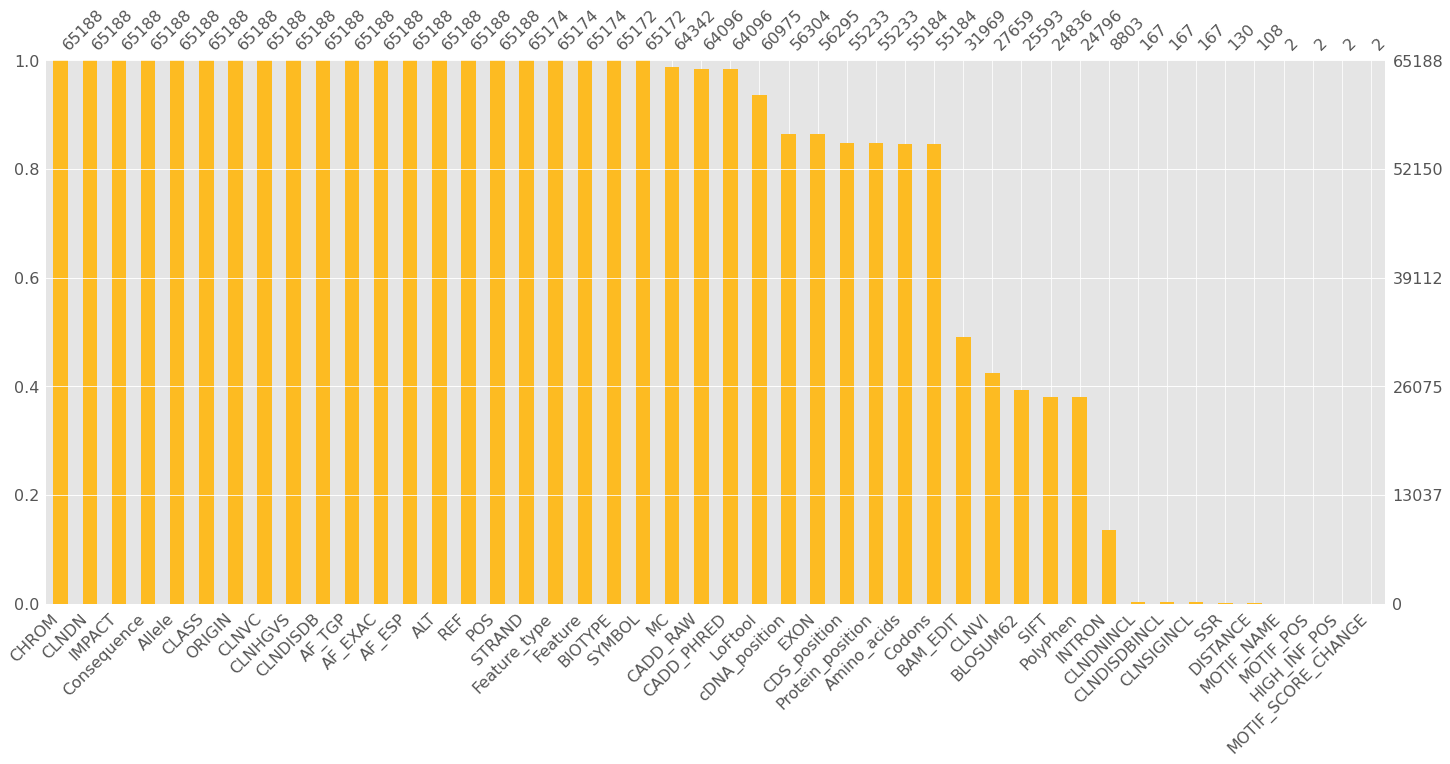

In [2]:
##Describing the data by showing howmany rows each column has


msno.bar(data1,color='#FDBB22',sort='descending')
plt.show()

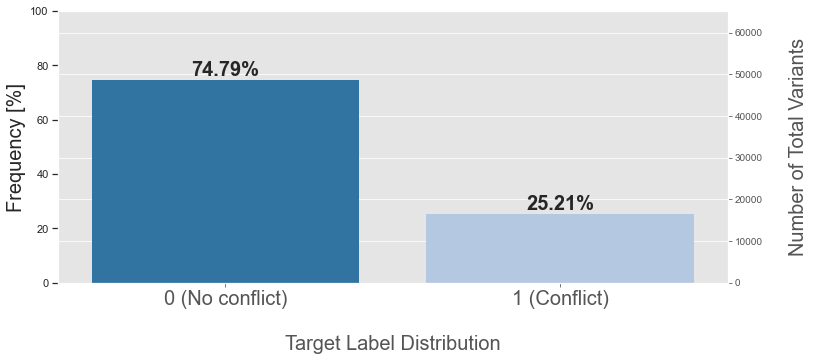

In [3]:
##Classification conflict column distribution graph


total = len(data1)
ax = sns.countplot(x = 'CLASS', data=data1, palette="tab20")
sns.set(font_scale=1)
ax.set_xlabel('\nTarget Label Distribution', fontsize=20)
ax.set_ylabel('\nNumber of Total Variants', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,5)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("left")
ax.set_xticklabels(["0 (No conflict)","1 (Conflict)"], fontsize=20)
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]', fontsize=20)
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom', fontsize=20, weight="bold") 
ax2.set_ylim(0,100)
ax.set_ylim(0,total)
ax2.grid(None)
sns.set_style("whitegrid")
plt.show()

In [4]:
##Columns needing "Personal" attention


#Spliting data into separate columns
data1[["Amino_acids_initial", "Amino_acids_replacement"]] = data1.Amino_acids.str.split("/",expand=True)
data1[["Codons_initial", "Codons_replacement"]] = data1.Codons.str.split("/",expand=True)

data1["EXON"]=data1["EXON"].astype(str)
data1["INTRON"]=data1["INTRON"].astype(str)

#turning unnecessary cells into nans
data1.loc[data1["EXON"] == data1["INTRON"], ["INTRON", "EXON"]] = np.nan
data1.loc[(data1["EXON"]!='nan') & (data1["INTRON"]!='nan') & (data1["REF"].str.len() == 1), ["INTRON", "EXON"]] = np.nan

#throwing out all nans
data1 = data1[data1['EXON'].notna()]
data1 = data1[data1['INTRON'].notna()]

#Spliting data into separate columns
data1[["EXON_start", "EXON_end"]] = data1.EXON.str.split("/",expand=True)
data1[["INTRON_start", "INTRON_end"]] = data1.INTRON.str.split("/",expand=True)

#Changing char chromosome names (Chromosomes X and Y) to numbers
data1["CHROM"]=data1["CHROM"].astype(str)
data1.loc[data1["CHROM"] == "X", "CHROM"] = "23"
data1.loc[data1["CHROM"] == "MT", "CHROM"] = "24"

In [5]:
##Separate dataframe for variant classification graph


CLNVCdata = deepcopy(data1)

#this variant was the most dominant one, we threw it out to make a better graph considering other variants
CLNVCdata = CLNVCdata[~CLNVCdata['CLNVC'].isin(['single_nucleotide_variant'])]

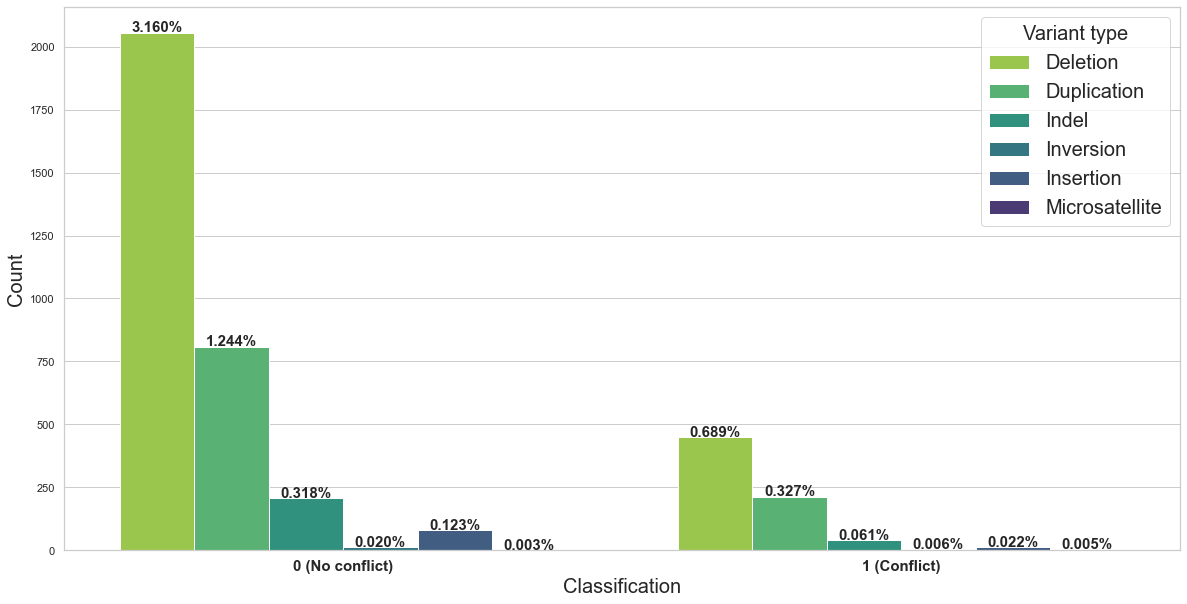

In [6]:
fig = plt.figure(figsize = (20, 10))
ax = sns.countplot(x= 'CLASS', data = CLNVCdata, hue = 'CLNVC', palette="viridis_r")
total=len(data1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*height/total),
            ha="center",weight="bold",fontsize=15) 


ax.set_xticklabels(['0 (No conflict)','1 (Conflict)'],fontsize=15, weight="bold")
ax.legend(fontsize=20, title="Variant type", title_fontsize=20)
ax.set_xlabel("Classification",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.show()

In [7]:
##Assigning types to columns


inttüüpi = ["POS", "ORIGIN", "CLASS", "CHROM"]
floattüüpi = ["AF_ESP", "AF_EXAC", "AF_TGP", "LoFtool", "CADD_PHRED", "CADD_RAW" ,  "STRAND", "BLOSUM62", "EXON_start", "EXON_end", "INTRON_start", "INTRON_end"]
strtüüpi = ["REF", "ALT", "Consequence", "IMPACT", "SYMBOL", "BIOTYPE" , "CLNVC", "IMPACT", "SIFT", "PolyPhen", "Amino_acids_initial", "Amino_acids_replacement", "Codons_initial", "Codons_replacement", "cDNA_position" , "CDS_position", "Protein_position"]


def datatypes(inttüüpi, strtüüpi, floattüüpi):
  for i in range(len(inttüüpi)):
      data1[inttüüpi[i]]=data1[inttüüpi[i]].astype(int)

  for i in range(len(strtüüpi)):
      data1[strtüüpi[i]]=data1[strtüüpi[i]].astype(str)
  
  for i in range(len(floattüüpi)):
      data1[floattüüpi[i]]=data1[floattüüpi[i]].astype(float).round(decimals=5)
      
datatypes(inttüüpi, strtüüpi, floattüüpi)

In [8]:
##Spliting CDNA, CDS and Protein into two columns each


data1[["cDNA_pos_start" , "cDNA_pos_end"]] = data1.cDNA_position.str.split("-",expand=True)
data1[["CDS_pos_start" , "CDS_pos_end"]] = data1.CDS_position.str.split("-",expand=True)
data1[["Protein_pos_start" , "Protein_pos_end"]] = data1.Protein_position.str.split("-",expand=True)

#all questionmarks to irrelevant number (str)
floatiks_ja_nan_nimetada = ["cDNA_pos_start" , "cDNA_pos_end", "CDS_pos_start" , "CDS_pos_end", "Protein_pos_start" , "Protein_pos_end"]
for i in range(len(floatiks_ja_nan_nimetada)):
  data1.loc[data1[floatiks_ja_nan_nimetada[i]] == "?", floatiks_ja_nan_nimetada[i]] = "999999999"

#columns from the aformentioned list to float type; nans to number
for i in range(len(floatiks_ja_nan_nimetada)):
  data1[floatiks_ja_nan_nimetada[i]]=data1[floatiks_ja_nan_nimetada[i]].astype(float)
  data1.loc[data1[floatiks_ja_nan_nimetada[i]].isna(), floatiks_ja_nan_nimetada[i]] = 999999999.0

In [9]:
##Throwing out unneccessary columns with too little or outdated info


välja = ["cDNA_position","CDS_position","Protein_position","Allele", "Amino_acids", "Codons", "EXON","INTRON", "CLNDN", "CLNDISDB","CLNDNINCL", "CLNSIGINCL", "CLNDISDBINCL", "CLNHGVS", "CLNVI", "MC", "SSR", "Feature_type", "Feature", "DISTANCE", "BAM_EDIT", "MOTIF_NAME", "MOTIF_POS", "HIGH_INF_POS", "MOTIF_SCORE_CHANGE"]
for i in välja:
    data1 = data1.drop(labels=[i], axis=1)

data1.describe()

,CHROM,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,EXON_start,EXON_end,INTRON_start,INTRON_end,cDNA_pos_start,cDNA_pos_end,CDS_pos_start,CDS_pos_end,Protein_pos_start,Protein_pos_end
count,65055.000000,6.505500e+04,65055.000000,65055.000000,65055.000000,65055.000000,65055.000000,65055.000000,60891.00000,63969.000000,63969.000000,25593.000000,56295.000000,56295.000000,8803.000000,8803.000000,6.505500e+04,6.505500e+04,6.505500e+04,6.505500e+04,6.505500e+04,6.505500e+04
mean,10.273415,7.764974e+07,0.014524,0.014505,0.015281,1.342864,0.251879,-0.007302,0.34529,15.690917,2.555825,-0.402258,24.359019,42.585789,19.211519,40.538566,1.348749e+08,9.655985e+08,1.513530e+08,9.668282e+08,1.513502e+08,9.820460e+08
std,6.554336,5.974045e+07,0.057818,0.059566,0.059573,5.694208,0.434096,0.999981,0.36132,10.840719,2.963114,1.872684,53.371651,73.234298,32.524768,63.962366,3.415861e+08,1.822592e+08,3.583896e+08,1.790860e+08,3.583908e+08,1.327852e+08
min,1.000000,1.387550e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.00007,0.001000,-5.477390,-3.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.600000e+01,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00
25%,4.000000,3.261399e+07,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.02430,7.139000,0.462690,-2.000000,5.000000,12.000000,5.000000,13.000000,1.039000e+03,1.000000e+09,8.470000e+02,1.000000e+09,2.830000e+02,1.000000e+09
50%,11.000000,5.803920e+07,0.000000,0.000040,0.000000,1.000000,0.000000,-1.000000,0.15700,14.100000,1.644610,-1.000000,11.000000,20.000000,10.000000,23.000000,2.270000e+03,1.000000e+09,2.136000e+03,1.000000e+09,7.120000e+02,1.000000e+09
75%,16.000000,1.128882e+08,0.001200,0.001240,0.001600,1.000000,1.000000,1.000000,0.71300,24.100000,4.385860,1.000000,21.000000,39.000000,21.000000,41.000000,6.514500e+03,1.000000e+09,7.009500e+03,1.000000e+09,2.337000e+03,1.000000e+09
max,23.000000,2.476080e+08,0.499000,0.499890,0.499800,513.000000,1.000000,1.000000,1.00000,99.000000,46.556260,3.000000,363.000000,363.000000,361.000000,362.000000,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09,1.000000e+09


In [10]:
##Replacing nans with column means in the columns mentioned in the list 


keskmised=["LoFtool","CADD_PHRED","CADD_RAW","BLOSUM62"]
for i in range(len(keskmised)):
    data1.loc[data1[keskmised[i]].notna()==False, keskmised[i]] = data1[keskmised[i]].mean()

#Replacing nans with 0 in the columns mentioned in the "floattüüpi" list
for i in range(len(floattüüpi)):
    data1.loc[data1[floattüüpi[i]].notna()==False, floattüüpi[i]] = 0

In [11]:
##Throwing out int type columns from the dataframe and checking for results


mitteInt = floattüüpi + strtüüpi

valja = ["cDNA_position" , "CDS_position", "Protein_position"]
for i in valja:
    mitteInt.remove(i)

for i in range(len(mitteInt)):
    if data1[mitteInt[i]].isnull().values.any():
        print(mitteInt[i])

In [12]:
##One hot encoding


data1 = pd.get_dummies(data1,columns=["REF", "ALT", "CLNVC", "Consequence", "IMPACT", "SYMBOL", "BIOTYPE","SIFT",
                                      "PolyPhen","Amino_acids_initial", 
                                      "Amino_acids_replacement","Codons_initial","Codons_replacement"], dummy_na=False)

In [13]:
##Throwing out columns with "_nan" in their name from the dataframe and checking for changes


print(len(data1.columns))
tulbad = list(data1.columns)
for i in range(len(tulbad)):
    if "_nan" in tulbad[i]:
        data1 = data1.drop(tulbad[i], axis=1)
        print(tulbad[i])

print(len(data1.columns))

6765
SIFT_nan
PolyPhen_nan
Amino_acids_initial_nan
Amino_acids_replacement_nan
Codons_initial_nan
Codons_replacement_nan
6759


In [14]:
##Final check-up on the columns to detect any missed nan values


tulbad = list(data1.columns)
for i in range(len(tulbad)):
    if data1[tulbad[i]].isnull().values.any():
        print(tulbad[i])
        
data1.isnull().sum()

CHROM                      0
POS                        0
AF_ESP                     0
AF_EXAC                    0
AF_TGP                     0
                          ..
Codons_replacement_ttct    0
Codons_replacement_ttg     0
Codons_replacement_ttgg    0
Codons_replacement_ttgt    0
Codons_replacement_ttt     0
Length: 6759, dtype: int64

In [15]:
##Spliting data into train and test


X_train, X_test, y_train, y_test = train_test_split(data1.drop(labels='CLASS',axis=1),data1.CLASS,train_size=0.7,random_state=0)

In [16]:
##DecisionTreeClassifier



dt = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)

In [17]:
##Accuracy score

y_pred1 = dt.predict(X_test)
acc_score1=accuracy_score(y_pred1, y_test)
print("Accuracy score:\n%s " %round(acc_score1*100,2))

Accuracy score:
71.31 


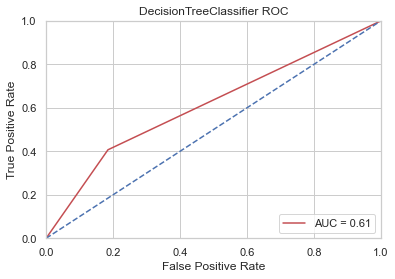

In [18]:
## Calculating the fpr and tpr for all thresholds of the classification


probs1 = dt.predict_proba(X_test)
preds1 = probs1[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)
sns.set_style("whitegrid")

plt.title('DecisionTreeClassifier ROC')
plt.plot(fpr1, tpr1, 'r', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
##RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=69,
                            oob_score=True).fit(X_train, y_train)

In [20]:
##Accuracy score


y_pred2 = rf.predict(X_test)
acc_score2=accuracy_score(y_pred2, y_test)
print("Accuracy score:\n%s " %round(acc_score2*100,2))

Accuracy score:
76.15 


In [21]:
##Checking for overfiting


print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

R^2 Training Score: 1.00 
OOB Score: 0.76 
R^2 Validation Score: 0.76


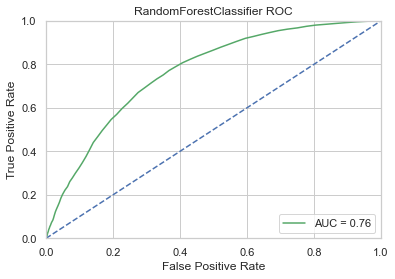

In [22]:
## Calculating the fpr and tpr for all thresholds of the classification


probs2 = rf.predict_proba(X_test)
preds2 = probs2[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)
sns.set_style("whitegrid")

plt.title('RandomForestClassifier ROC')
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
##LGBMClassifier


lgbm = LGBMClassifier(
        max_depth=9,
        n_estimators=100,random_state=0,num_leaves=80,min_data_in_leaf=50)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


LGBMClassifier(max_depth=9, min_data_in_leaf=50, num_leaves=80, random_state=0)

In [24]:
##Accurcy score


y_pred3 = lgbm.predict(X_test)
acc_score3=accuracy_score(y_pred3, y_test)
print("Accuracy score:\n%s " %round(acc_score3*100,2))

Accuracy score:
77.38 


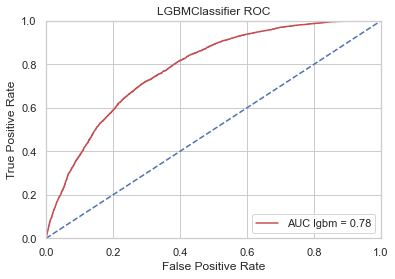

In [25]:
## Calculating the fpr and tpr for all thresholds of the classification


probs3 = lgbm.predict_proba(X_test)
preds3 = probs3[:,1]
fpr3, tpr3, threshold = metrics.roc_curve(y_test, preds3)
roc_auc3 = metrics.auc(fpr3, tpr3)


plt.title('LGBMClassifier ROC')
plt.plot(fpr3, tpr3, 'r', label = 'AUC lgbm = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

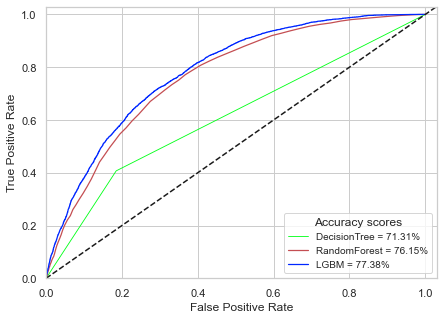

In [26]:
## Graph showing all 3 classifiers roc curves


fig = plt.figure(figsize = (7, 5))
plt.plot(fpr1, tpr1, '#00FF17', linewidth=0.85, label = 'DecisionTree = %s' %round(acc_score1*100,2) + "%")
plt.plot(fpr2, tpr2, 'r', linewidth=1.25, label = 'RandomForest = %s' %round(acc_score2*100,2)+ "%")
plt.plot(fpr3, tpr3, '#0027FF', linewidth=1.25, label = 'LGBM = %s' %round(acc_score3*100,2)+ "%")
plt.legend(loc='lower right', title="Accuracy scores", title_fontsize=12, fontsize=10)
plt.plot([0, 1.03], [0, 1.03],'k--')
plt.xlim([0, 1.03])
plt.ylim([0, 1.03])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

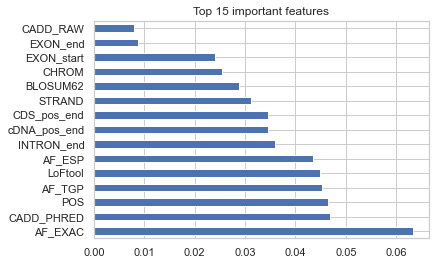

In [27]:
##Picking out the most important features


feat_importances = pd.Series(rf.feature_importances_, index=data1.columns[:-1])
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

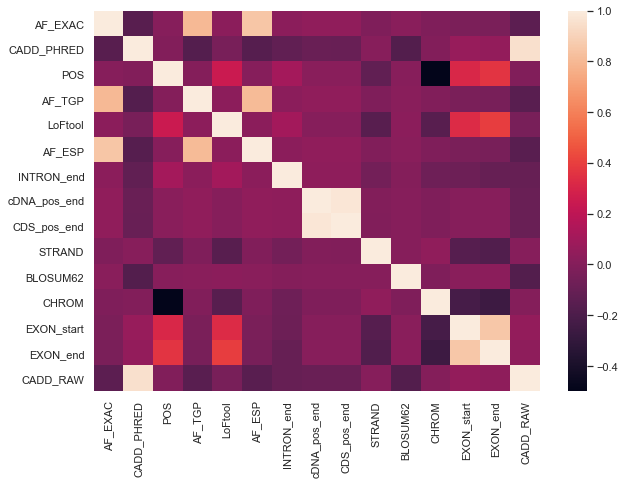

In [28]:
#pairwise correlation graph

top15 = data1[["AF_EXAC", "CADD_PHRED", "POS", "AF_TGP", "LoFtool", "AF_ESP", "INTRON_end", "cDNA_pos_end", "CDS_pos_end",
              "STRAND", "BLOSUM62", "CHROM", "EXON_start", "EXON_end", "CADD_RAW"]]

fig, ax = plt.subplots(figsize=(10,7))
corr = top15.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [29]:
##LinearRegression

# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (data1.columns[i],v))

Feature: CHROM, Score: -0.11932
Feature: POS, Score: -0.00000
Feature: AF_ESP, Score: -0.45849
Feature: AF_EXAC, Score: -0.20305
Feature: AF_TGP, Score: -0.66082
Feature: ORIGIN, Score: 0.00021
Feature: CLASS, Score: 0.64106
Feature: STRAND, Score: -0.24629
Feature: LoFtool, Score: -0.00044
Feature: CADD_PHRED, Score: -0.00156
Feature: CADD_RAW, Score: 0.00039
Feature: BLOSUM62, Score: 0.00008
Feature: EXON_start, Score: -0.05065
Feature: EXON_end, Score: -0.00005
Feature: INTRON_start, Score: -0.05088
Feature: INTRON_end, Score: -0.00001
Feature: cDNA_pos_start, Score: -0.00000
Feature: cDNA_pos_end, Score: 0.00001
Feature: CDS_pos_start, Score: 0.00000
Feature: CDS_pos_end, Score: -0.00000
Feature: Protein_pos_start, Score: 0.00000
Feature: Protein_pos_end, Score: -3.87550
Feature: REF_A, Score: -0.31152
Feature: REF_AA, Score: -3.82475
Feature: REF_AAAAAAAAACAAAAAAAAAAAC, Score: -0.46276
Feature: REF_AAAAAAAAAGAAAAG, Score: -2.04984
Feature: REF_AAAAAC, Score: -3.94113
Feature: REF_

Feature: SYMBOL_PACS1, Score: -1.15086
Feature: SYMBOL_PAFAH1B1, Score: -0.04751
Feature: SYMBOL_PAH, Score: 0.25324
Feature: SYMBOL_PAK3, Score: 0.37294
Feature: SYMBOL_PALB2, Score: -1.10986
Feature: SYMBOL_PALLD, Score: -1.19030
Feature: SYMBOL_PANK2, Score: -0.09947
Feature: SYMBOL_PARK2, Score: -3.44982
Feature: SYMBOL_PARK7, Score: 0.36218
Feature: SYMBOL_PARN, Score: -1.75032
Feature: SYMBOL_PAX2, Score: -0.78466
Feature: SYMBOL_PAX3, Score: -0.64052
Feature: SYMBOL_PAX4, Score: -0.35549
Feature: SYMBOL_PAX6, Score: -0.42748
Feature: SYMBOL_PAX8, Score: -1.52219
Feature: SYMBOL_PAX9, Score: 0.50374
Feature: SYMBOL_PC, Score: -0.87518
Feature: SYMBOL_PCBD1, Score: -0.49406
Feature: SYMBOL_PCCA, Score: -1.95005
Feature: SYMBOL_PCCB, Score: 1.20388
Feature: SYMBOL_PCDH15, Score: 1.07670
Feature: SYMBOL_PCDH19, Score: 0.32637
Feature: SYMBOL_PCK1, Score: -0.32253
Feature: SYMBOL_PCK2, Score: 1.74674
Feature: SYMBOL_PCNT, Score: -2.33417
Feature: SYMBOL_PCSK9, Score: -0.80159
Feature

Feature: Codons_initial_tGTAAA, Score: -1.82148
Feature: Codons_initial_tGTAgt, Score: 2.15359
Feature: Codons_initial_tGTTct, Score: -1.98798
Feature: Codons_initial_tGTTtc, Score: 11.80601
Feature: Codons_initial_tGa, Score: -14.11929
Feature: Codons_initial_tGc, Score: -16.42213
Feature: Codons_initial_tGg, Score: -16.86901
Feature: Codons_initial_tGt, Score: -6.71447
Feature: Codons_initial_tTAAAT, Score: 0.00000
Feature: Codons_initial_tTAACt, Score: 0.00000
Feature: Codons_initial_tTACTC, Score: 7.99028
Feature: Codons_initial_tTAGAt, Score: 8.90219
Feature: Codons_initial_tTC, Score: 6.29481
Feature: Codons_initial_tTCTca, Score: 5.51938
Feature: Codons_initial_tTCTcc, Score: 5.62535
Feature: Codons_initial_tTCTcg, Score: 4.60334
Feature: Codons_initial_tTCTct, Score: 0.00000
Feature: Codons_initial_tTGAAa, Score: 0.00000
Feature: Codons_initial_tTGATT, Score: 9.59505
Feature: Codons_initial_tTGCTTGTTCCt, Score: 0.00000
Feature: Codons_initial_tTGTGt, Score: 8.13693
Feature: Cod

In [39]:
##Dataframe for feature importances


data2=pd.DataFrame(columns=['Feature_name', 'Score'])

score = []
data1Tulbad = []

for i,v in enumerate(importance):
    data1Tulbad.append(list(data1.columns)[i])
    score.append(v)

data2['Feature_name'] = data1Tulbad
data2["Score"] = score

data2.head()

,Feature_name,Score
0,CHROM,-1.193179e-01
1,POS,-3.625610e-09
2,AF_ESP,-4.584904e-01
3,AF_EXAC,-2.030497e-01
4,AF_TGP,-6.608213e-01


In [40]:
##Turning Score column into float type, sorting it by decending values


pd.set_option('display.max_colwidth', -1)

data2["Score"]=data2["Score"].astype(float)
data2=data2.sort_values(by=["Score"],ascending=False)

print(data2.head(10))
print()
print(data2.tail(10))

                                                                    Feature_name  \
1359  Consequence_inframe_insertion                                                
1375  Consequence_splice_region_variant&coding_sequence_variant&intron_variant     
1365  Consequence_splice_acceptor_variant                                          
4478  Amino_acids_replacement_NX                                                   
1371  Consequence_splice_donor_variant&coding_sequence_variant&intron_variant      
1368  Consequence_splice_acceptor_variant&intron_variant                           
1364  Consequence_protein_altering_variant                                         
1391  Consequence_synonymous_variant                                               
1366  Consequence_splice_acceptor_variant&coding_sequence_variant                  
1367  Consequence_splice_acceptor_variant&coding_sequence_variant&intron_variant   

            Score  
1359  5169.312070  
1375  4564.713089  
1365  1848.6929

<ipython-input-40-98de9d3a82c0>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [41]:
##Turning Score column values into their absolute values


absValues = deepcopy(data2)
absValues.Score = absValues.Score.abs()
absValues=absValues.sort_values(by=["Score"],ascending=False)


absValues = absValues[:10]

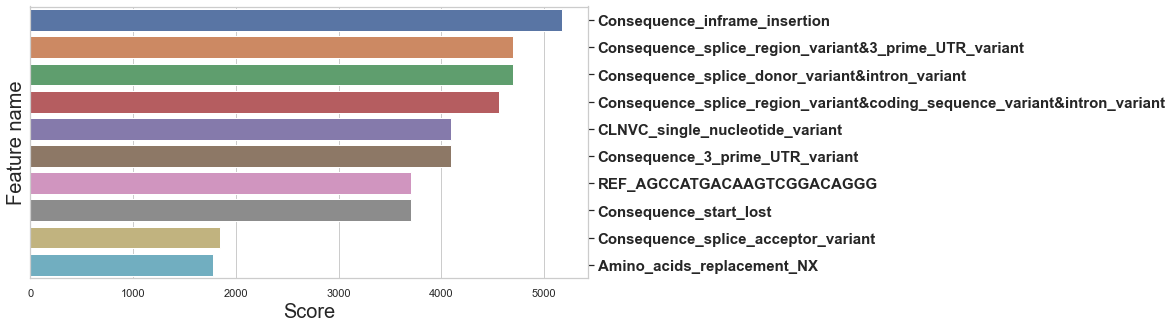

In [44]:
##Pairwise correlation graph

sns.set_style("whitegrid")
fig = plt.figure(figsize = (10, 5))
ax = sns.barplot(x= absValues["Score"], y=absValues['Feature_name'])
ax.set_yticklabels(absValues['Feature_name'], fontsize=15, weight="bold")
ax.yaxis.tick_right()
ax.set_xlabel("Score",fontsize=20)
ax.set_ylabel("Feature name",fontsize=20)
ax.yaxis.set_label_position("left")